In [1]:
import random
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Generate num_friends using a normal distribution
num_friends = [int(random.gauss(50, 10)) for _ in range(204)]
num_friends = [max(1, min(nf, 100)) for nf in num_friends]

# Generate daily_minutes based on num_friends with some noise
daily_minutes = [int(nf * random.uniform(1.0, 1.5) + random.gauss(0, 10)) for nf in num_friends]
daily_minutes = [max(1, min(dm, 1440)) for dm in daily_minutes]  # 1440 minutes in a day


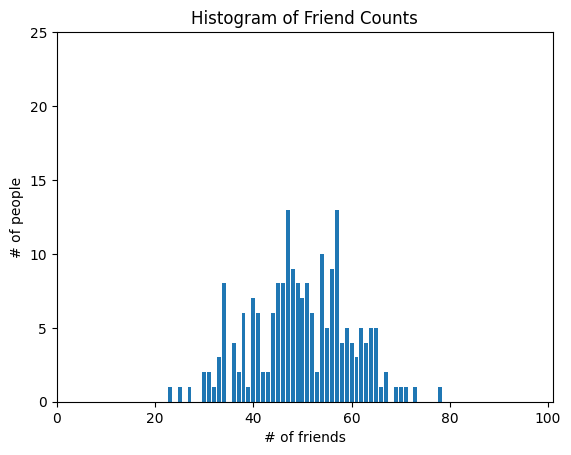

In [3]:
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")  
plt.ylabel("# of people")
plt.show()

In [4]:
num_points = len(num_friends)               # 204

In [5]:
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

In [6]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

In [7]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

49.81372549019608

In [8]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

In [9]:
def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [10]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [11]:
median(num_friends)

50.0

In [12]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * (len(xs) - 1))  # Adjusted to avoid index out of range
    return sorted(xs)[p_index]

for i in range(0, 101, 25):
    print(f"{i}-th percentile: {quantile(num_friends, i/100)}")

0-th percentile: 23
25-th percentile: 44
50-th percentile: 50
75-th percentile: 57
100-th percentile: 78


In [13]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[47, 57]

In [14]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

data_range(num_friends)

55

In [15]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

100.64493383560321

In [16]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

10.032194866309327

In [17]:
def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)  

interquartile_range(num_friends)

13

In [18]:
from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

covariance(num_friends, daily_minutes)


112.82686177919445

In [19]:
def correlaation(xs: List[float], ys: List[float]) -> float:
    """Measures how xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0  # if no variation, correlation is zero

correlaation(num_friends, daily_minutes)

0.6936651810746607

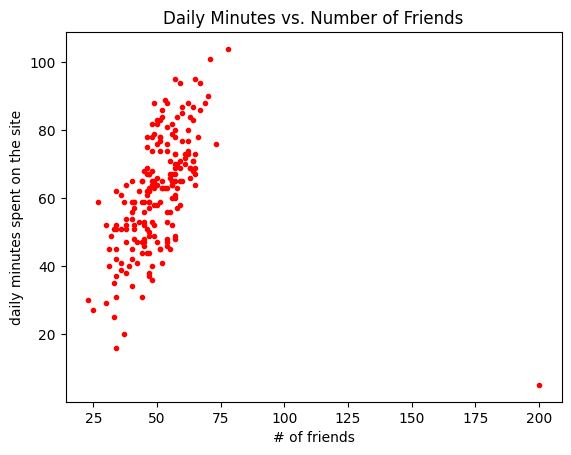

In [22]:
# extreme example of outliers
plt.plot(num_friends + [200], daily_minutes + [5], 'r.')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

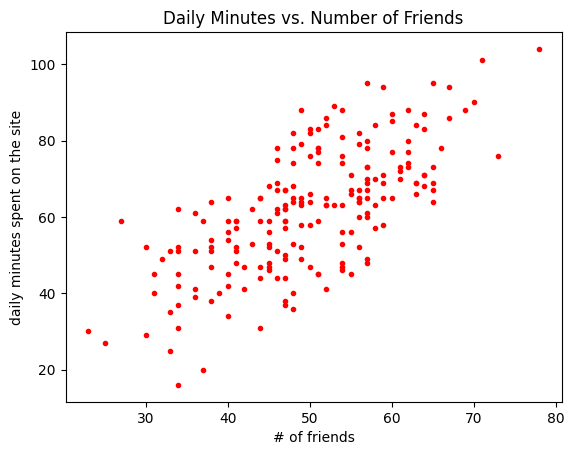

In [23]:
# remove the outlier
plt.plot(num_friends, daily_minutes, 'r.')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()